Data from [single-cell time-lapse of mouse prenatal development from gastrula to birth](https://doi.org/10.1038/s41586-024-07069-w)

In [1]:
import numpy as np
from CoPhaser import utils
from CoPhaser.trainer import Trainer
from CoPhaser.loss import Loss
from CoPhaser import plotting
from CoPhaser.model import CoPhaser
from CoPhaser import gene_sets
import pickle


import matplotlib.pyplot as plt
import seaborn as sns

import anndata
import scanpy as sc

import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
DATA_FOLDER = "../../../data/"
adata = anndata.read_h5ad(
    f"{DATA_FOLDER}/somite/mesodermal_progenitors_Tbx6p_names_mapped_2.h5ad"
)

In [4]:
adata.obs

cell_id  \
run_4_P2-01A.CGTCTTCCTTAGGCCATAG-0                run_4_P2-01A.CGTCTTCCTTAGGCCATAG   
run_4_P2-01A.AAAGCTGATTCGTAATGCAG-0              run_4_P2-01A.AAAGCTGATTCGTAATGCAG   
run_4_P2-01A.CGTTGATCTCTTGGTAATG-0                run_4_P2-01A.CGTTGATCTCTTGGTAATG   
run_4_P2-01A.AATACCGAATGGCGAACTCG-0              run_4_P2-01A.AATACCGAATGGCGAACTCG   
run_4_P2-01A.CGTAGGCTTTTAGGACCGG-0                run_4_P2-01A.CGTAGGCTTTTAGGACCGG   
...                                                                            ...   
run_17_PD-12H_S384.GTCGTAACTAAGACGGCCA-2    run_17_PD-12H_S384.GTCGTAACTAAGACGGCCA   
run_17_PD-12H_S384.GAGACTAGTTGCATATAAC-2    run_17_PD-12H_S384.GAGACTAGTTGCATATAAC   
run_17_PD-12H_S384.TAGCCAATTTTGCGGACCTA-2  run_17_PD-12H_S384.TAGCCAATTTTGCGGACCTA   
run_17_PD-12H_S384.TCGAAGGATTGGCTGATGA-2    run_17_PD-12H_S384.TCGAAGGATTGGCTGATGA   
run_17_PD-12H_S384.ATGGTAACTTCCATTATCTA-2  run_17_PD-12H_S384.ATGGTAACTTCCATTATCTA   

                                          keep    day  embryo_id  \
run_4_P2-01A.CGTCTTCCTTAGGCCATAG-0         yes   E8.5   embryo_7   
run_4_P2-01A.AAAGCTGATTCGTAATGCAG-0        yes   E8.5  embryo_10   
run_4_P2-01A.CGTTGATCTCTTGGTAATG-0         yes   E8.5   embryo_9   
run_4_P2-01A.AATACCGAATGGCGAACTCG-0        yes   E8.5  embryo_10   
run_4_P2-01A.CGTAGGCTTTTAGGACCGG-0         yes   E8.5  embryo_12   
...                                        ...    ...        ...   
run_17_PD-12H_S384.GTCGTAACTAAGACGGCCA-2   yes  E9.75  embryo_29   
run_17_PD-12H_S384.GAGACTAGTTGCATATAAC-2   yes  E10.0  embryo_30   
run_17_PD-12H_S384.TAGCCAATTTTGCGGACCTA-2  yes  E9.75  embryo_26   
run_17_PD-12H_S384.TCGAAGGATTGGCTGATGA-2   yes  E9.75  embryo_29   
run_17_PD-12H_S384.ATGGTAACTTCCATTATCTA-2  yes  E9.75  embryo_25   

                                          experimental_batch  inferred_theta  \
run_4_P2-01A.CGTCTTCCTTAGGCCATAG-0                     run_4        2.660846   
run_4_P2-01A.AAAGCTGATTCGTAATGCAG-0                    run_4       -1.346964   
run_4_P2-01A.CGTTGATCTCTTGGTAATG-0                     run_4        1.409665   
run_4_P2-01A.AATACCGAATGGCGAACTCG-0                    run_4        0.696209   
run_4_P2-01A.CGTAGGCTTTTAGGACCGG-0                     run_4        2.054003   
...                                                      ...             ...   
run_17_PD-12H_S384.GTCGTAACTAAGACGGCCA-2              run_17       -0.585669   
run_17_PD-12H_S384.GAGACTAGTTGCATATAAC-2              run_17       -1.408091   
run_17_PD-12H_S384.TAGCCAATTTTGCGGACCTA-2             run_17        1.651443   
run_17_PD-12H_S384.TCGAAGGATTGGCTGATGA-2              run_17       -2.724357   
run_17_PD-12H_S384.ATGGTAACTTCCATTATCTA-2             run_17       -0.309730   

                                          leiden_label  is_TB  umap_density  \
run_4_P2-01A.CGTCTTCCTTAGGCCATAG-0                   6  False      0.434719   
run_4_P2-01A.AAAGCTGATTCGTAATGCAG-0                 12  False      0.238552   
run_4_P2-01A.CGTTGATCTCTTGGTAATG-0                   0  False      0.783213   
run_4_P2-01A.AATACCGAATGGCGAACTCG-0                 10   True      0.246459   
run_4_P2-01A.CGTAGGCTTTTAGGACCGG-0                   6  False      0.652259   
...                                                ...    ...           ...   
run_17_PD-12H_S384.GTCGTAACTAAGACGGCCA-2             8  False      0.350089   
run_17_PD-12H_S384.GAGACTAGTTGCATATAAC-2             7  False      0.435054   
run_17_PD-12H_S384.TAGCCAATTTTGCGGACCTA-2            8  False      0.465305   
run_17_PD-12H_S384.TCGAAGGATTGGCTGATGA-2            13   True      0.070725   
run_17_PD-12H_S384.ATGGTAACTTCCATTATCTA-2            1  False      0.809063   

                                           cycling  posterior_anterior_axis  \
run_4_P2-01A.CGTCTTCCTTAGGCCATAG-0            True                -5.489056   
run_4_P2-01A.AAAGCTGATTCGTAATGCAG-0          False                 7.330379   
run_4_P2-01A.CGTTGATCTCTTGGTAATG-0            True                 0.468246   

In [5]:
adata_all_genes = adata.copy()
layer_to_use = "total"
library_size = adata_all_genes.layers[layer_to_use].sum(axis=1).A1

In [6]:
adata.X = adata.layers["total"].copy()

In [7]:
# Preprocess data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [8]:
SMALL_CYCLING_GENE_SET = gene_sets.SMALL_CELL_CYCLE_GENE_SET
SMALL_CYCLING_GENE_SET = [x for x in SMALL_CYCLING_GENE_SET if x in adata.var_names]
adata = adata[:, adata.var_names.isin(SMALL_CYCLING_GENE_SET)]

In [9]:
len(SMALL_CYCLING_GENE_SET)

97

In [10]:
# mean center the adata
adata.X = adata.X - adata.X.mean(axis=1)

/tmp/ipykernel_4174853/1782500935.py:2: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  adata.X = adata.X - adata.X.mean(axis=1)
/home/maxine/miniconda3/envs/CoPhaser_Env/lib/python3.13/site-packages/anndata/_core/anndata.py:636: FutureWarning: You are attempting to set `X` to a matrix on a view which has non-unique indices. The resulting `adata.X` will likely not equal the value to which you set it. To avoid this potential issue, please make a copy of the data first. In the future, this operation will throw an error.
  warnings.warn(msg, FutureWarning, stacklevel=1)
/tmp/ipykernel_4174853/1782500935.py:2: ImplicitModificationWarning: Modifying `X` on a view results in data being overridden
  adata.X = adata.X - adata.X.mean(axis=1)
/home/maxine/miniconda3/envs/CoPhaser_Env/lib/python3.13/site-packages/scipy/sparse/_index.py:201: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  s

/home/maxine/miniconda3/envs/CoPhaser_Env/lib/python3.13/site-packages/scanpy/preprocessing/_pca/__init__.py:384: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = x_pca


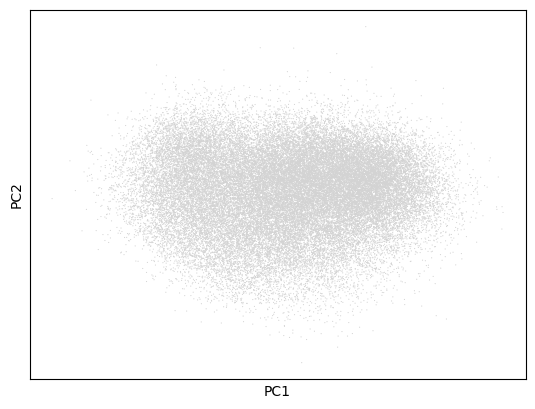

In [11]:
# pca on the data
sc.pp.pca(adata)
# plot the pca
sc.pl.pca(adata)

In [12]:
# add PCA theta to adata.obs
adata.obs["pca_theta"] = np.arctan2(
    adata.obsm["X_pca"][:, 1], adata.obsm["X_pca"][:, 0]
)
adata_all_genes.obs["pca_theta"] = adata.obs["pca_theta"].copy()
adata = adata_all_genes.copy()

<Axes: ylabel='Frequency'>

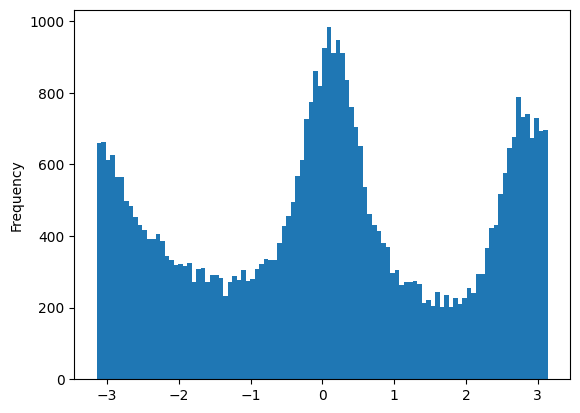

In [13]:
adata.obs["pca_theta"].plot.hist(bins=100)

In [14]:
g = utils.get_variable_genes(adata)
len(g)

2000

Epoch 1/200, elbo_loss: 5297.4109, kl_div_f: 4.6796, kl_div_z: 30.8571, fraction_cycling_cells: 1.0000, l2_px_rate: 0.0000, entropy_loss_unweighted: -2.5045, entropy_loss: -375.6797, radial_variance: 7.8204, radius: 18.2797, L1_mu_z: 0.0000, MI_loss: 0.0000, total_loss: 4947.8311
Epoch 2/200, elbo_loss: 4836.3145, kl_div_f: 4.6286, kl_div_z: 38.4714, fraction_cycling_cells: 1.0000, l2_px_rate: 0.0000, entropy_loss_unweighted: -3.0378, entropy_loss: -455.6703, radial_variance: 5.1598, radius: 6.4580, L1_mu_z: 0.0000, MI_loss: 0.0001, total_loss: 4392.2682
Epoch 3/200, elbo_loss: 4721.1788, kl_div_f: 4.5668, kl_div_z: 37.4303, fraction_cycling_cells: 1.0000, l2_px_rate: 0.0000, entropy_loss_unweighted: -3.3243, entropy_loss: -498.6473, radial_variance: 2.5411, radius: 3.4564, L1_mu_z: 0.0000, MI_loss: 0.0006, total_loss: 4228.5882
Epoch 4/200, elbo_loss: 4634.7085, kl_div_f: 4.5020, kl_div_z: 36.7887, fraction_cycling_cells: 1.0000, l2_px_rate: 0.0000, entropy_loss_unweighted: -3.3759, e

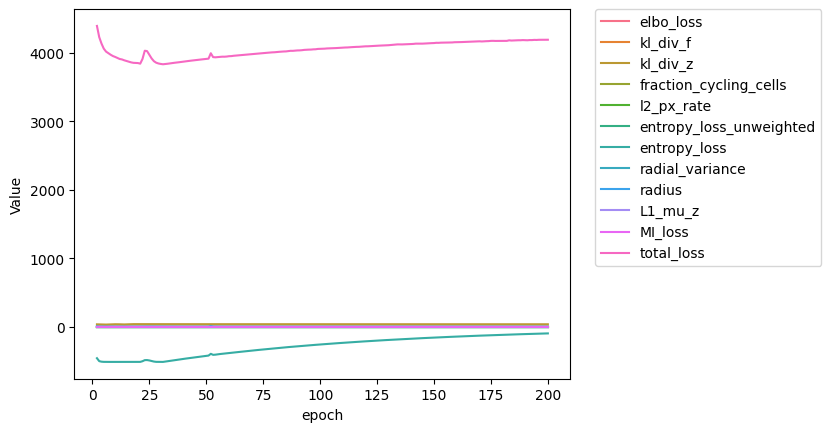

In [ ]:
model = CoPhaser(
    SMALL_CYCLING_GENE_SET,
    g,
    n_latent=10,
    use_lambda=True,
    n_harm=1,
)
model.load_anndata(adata, layer_to_use="total")

trainer = Trainer(
    model,
    Loss.compute_loss,
    calculate_entropy_per_batch=True,
    L2_Z_decoder_loss_weight=0,
    entropy_weight_factor=150,
    closed_circle_weight=15,
    MI_weight=100,
    cycling_status_prior=1,
    beta_kl_cycling_status=20,
    rhythmic_likelihood_weight=20,
    non_rhythmic_likelihood_weight=5,
    MI_detach="f",
)
trainer.train_model(
    n_epochs=200,
    lr=1e-2,
    device="cuda",
    batch_size=4096,
)

In [19]:
len(SMALL_CYCLING_GENE_SET)

97

<Axes: ylabel='Count'>

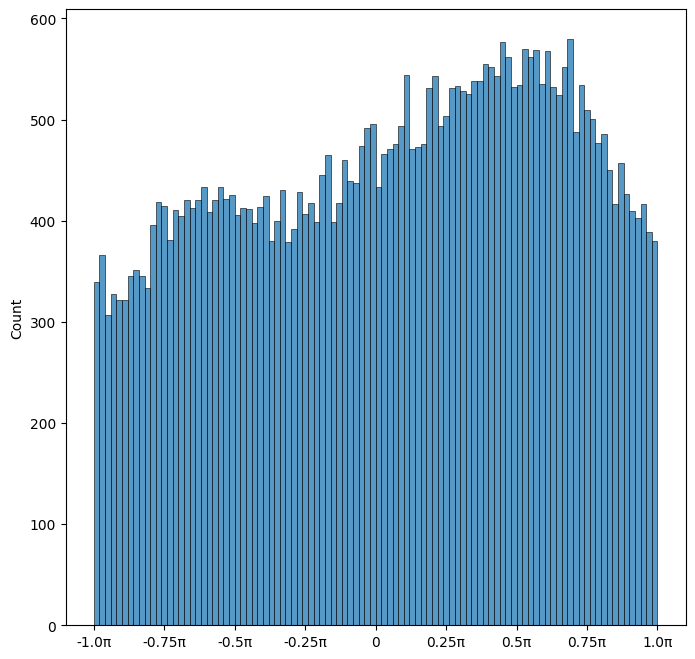

In [20]:
# Get the infered theta values
model.to("cpu")
generative_outputs, space_outputs = model.get_outputs()
thetas = space_outputs["theta"]
plotting.modify_axis_labels()
sns.histplot(thetas, bins=100)

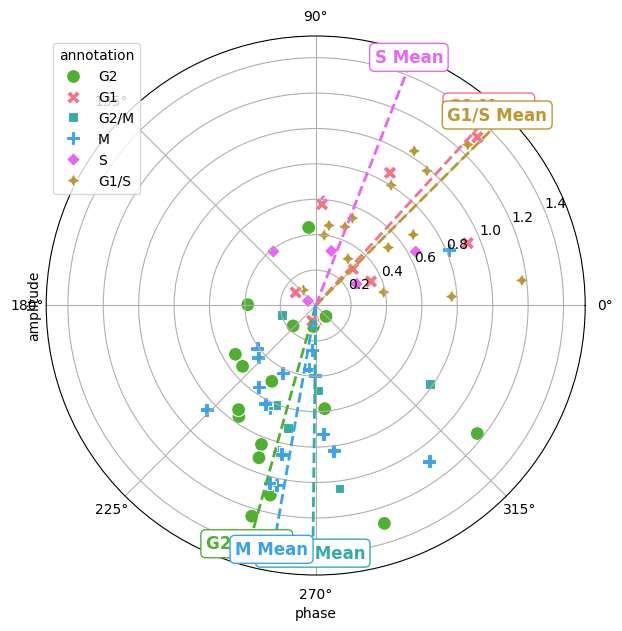

In [21]:
thetas = model.infer_pseudotimes(adata, "total", True)

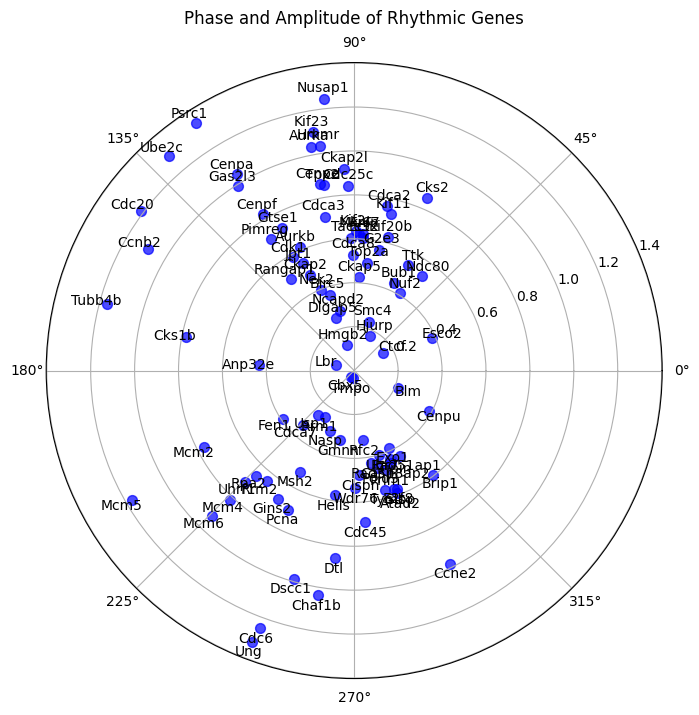

In [22]:
model.plot_fourier_coefficients()

<Axes: >

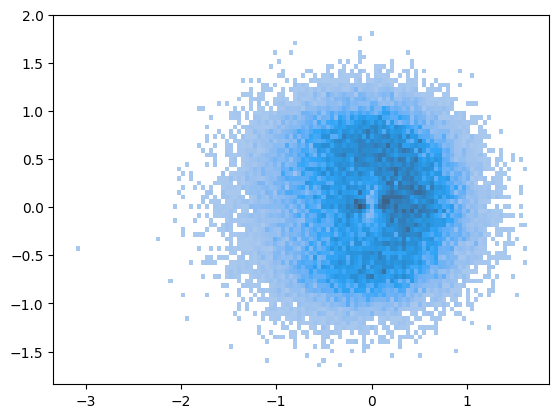

In [23]:
cells_projected = space_outputs["x_projected"].detach().numpy()
sns.histplot(x=cells_projected[:, 0], y=cells_projected[:, 1])

In [24]:
def add_theta(df, theta, theta_pca):
    df["inferred_theta"] = theta
    df["pca_theta"] = theta_pca
    return df


df_mean = pd.DataFrame(
    generative_outputs["px_rate"].detach().numpy(), columns=model.context_genes
)
df_mean = add_theta(df_mean, thetas, adata.obs["pca_theta"].values)
# df_rhythmic = pd.DataFrame(generative_outputs["rhythmic_term"].detach().numpy(), columns=model.rhythmic_gene_names)
df_rhythmic = pd.DataFrame(
    generative_outputs["F"].detach().numpy(), columns=model.context_genes
)
df_rhythmic = add_theta(df_rhythmic, thetas, adata.obs["pca_theta"].values)
df_z = pd.DataFrame(
    generative_outputs["Z"].detach().numpy(), columns=model.context_genes
)
df_z = add_theta(df_z, thetas, adata.obs["pca_theta"].values)

[Text(0.5, 0, 'Inferred θ'), Text(0, 0.5, 'PCA θ')]

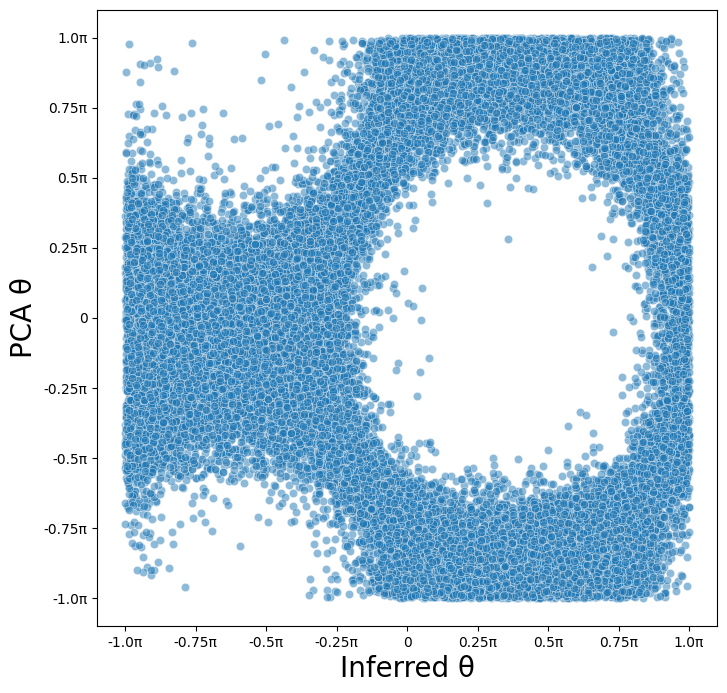

In [26]:
fig, ax = plotting.modify_axis_labels(axis="both")
sns.scatterplot(x=thetas, y=adata.obs["pca_theta"].values, alpha=0.5).set(
    xlabel="Inferred θ", ylabel="PCA θ"
)

/home/maxine/Documents/paychere/CoPhaser/src/CoPhaser/plotting.py:539: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend(loc="upper left", bbox_to_anchor=(1, 1))


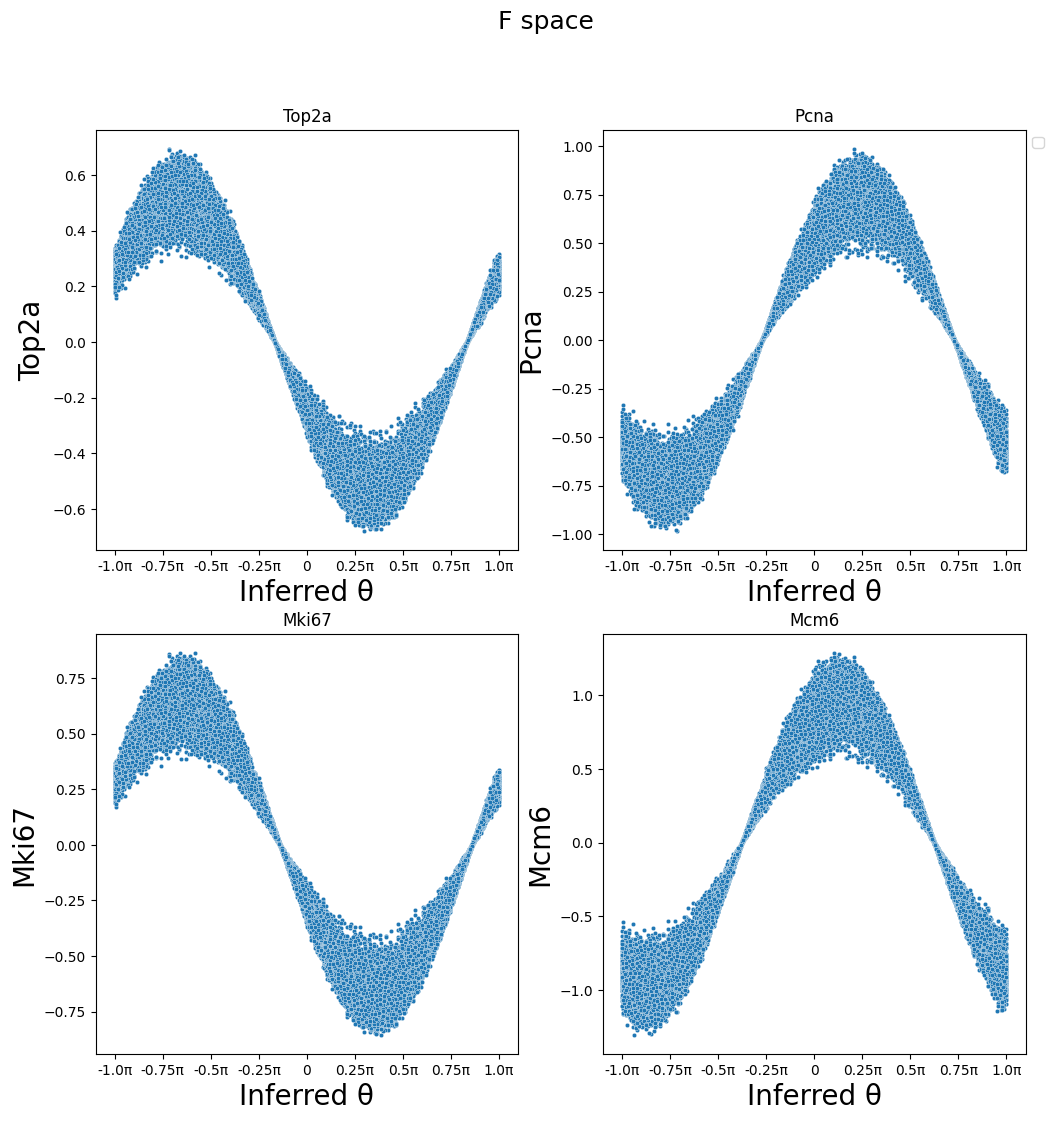

In [29]:
plotting.plot_model_decoded_space(df_rhythmic, gene_to_upper=False, title="F space")

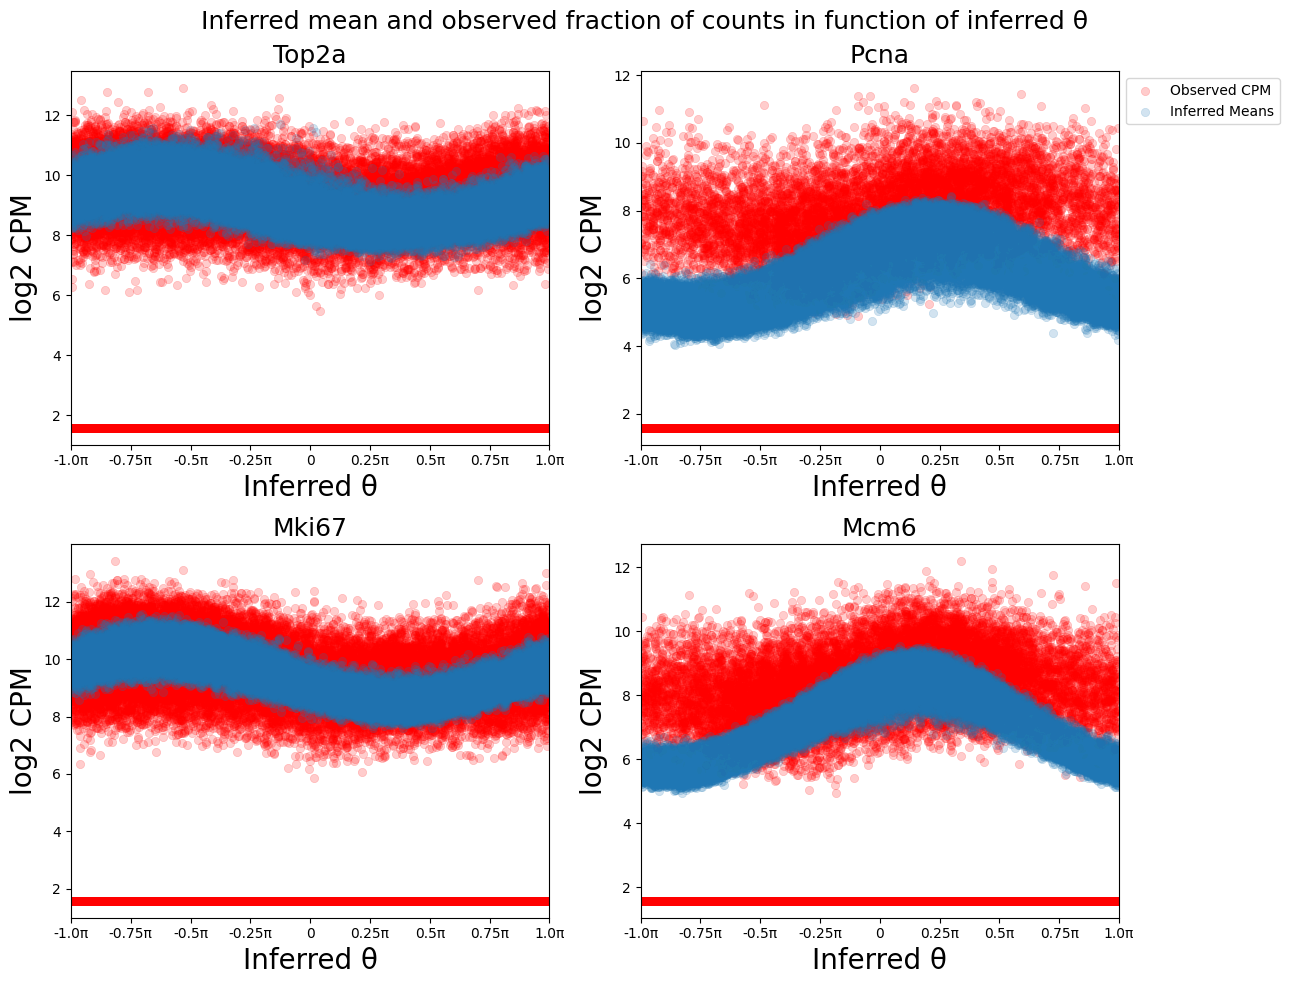

In [32]:
plotting.plot_gene_profile(
    df_mean,
    adata,
    layer_to_use="total",
    library_size=library_size,
    alpha=0.2,
    gene_to_upper=False,
)

In [33]:
adata.obs["library_size"] = library_size
adata.obs["inferred_theta"] = df_mean["inferred_theta"].to_numpy()

In [34]:
adata.obs["batch"] = 1

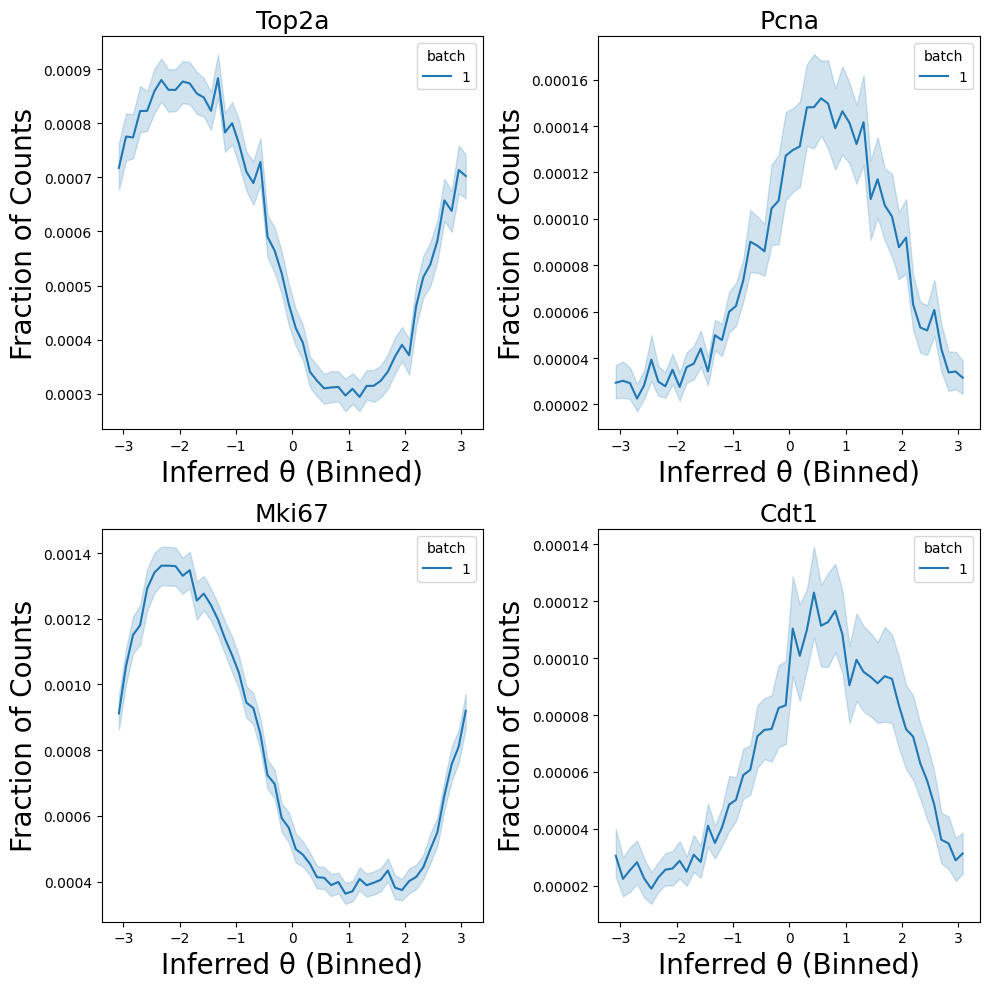

In [36]:
def plot_gene_profile(
    adata,
    genes=["Top2a", "Pcna", "Mki67", "Cdt1"],
    layer_to_use="total",
    ncols=2,
    gene_to_upper=True,
    library_size=None,
    phase_name="inferred_theta",
    n_bins=50,  # Number of bins for inferred θ
):
    # Determine grid size
    nrows = np.ceil(len(genes) / ncols).astype(int)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axs = axs.flatten()

    # Convert gene names to uppercase if needed
    if gene_to_upper:
        genes = [gene.upper() for gene in genes]

    # Calculate library size if not provided
    if library_size is None:
        library_size = adata.layers[layer_to_use].sum(axis=1).A1

    # Extract inferred θ and batch information
    inferred_theta = adata.obs[phase_name].values
    batch = adata.obs["batch"].values

    for i, gene in enumerate(genes):
        if i >= len(axs):
            break  # Skip extra axes

        # Extract expression data for the gene
        expression = (
            adata[:, gene].layers[layer_to_use].toarray().flatten() / library_size
        )

        # Create a DataFrame for plotting
        df = pd.DataFrame(
            {"inferred_theta": inferred_theta, "expression": expression, "batch": batch}
        )

        # Bin inferred θ into `n_bins` bins
        df["theta_bin"] = pd.cut(df["inferred_theta"], bins=n_bins, labels=False)
        df["binned_theta"] = df.groupby("theta_bin")["inferred_theta"].transform("mean")

        # Compute the mean expression in each bin for each batch
        bin_means = df.groupby(["theta_bin", "batch"])["expression"].mean().unstack()

        # Calculate the ratio of batch means for each bin
        # avg_ratio = ((bin_means.iloc[:,1] - bin_means.iloc[:,0]) / (bin_means.iloc[:,1] + bin_means.iloc[:,0])).mean() * 100# Assuming batch labels are 0 and 1
        # print(f"Gene: {gene}, Average Ratio (Batch 1 / Batch 0): {avg_ratio:.3f}")

        # Plot smoothed gene profile using sns.lineplot
        sns.lineplot(
            data=df,
            x="binned_theta",
            y="expression",
            hue="batch",
            ax=axs[i],
        )

        # Set plot labels and title
        axs[i].set(
            xlabel="Inferred θ (Binned)", ylabel="Fraction of Counts", title=f"{gene}"
        )

    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_gene_profile(
    adata, layer_to_use="total", phase_name="inferred_theta", gene_to_upper=False
)

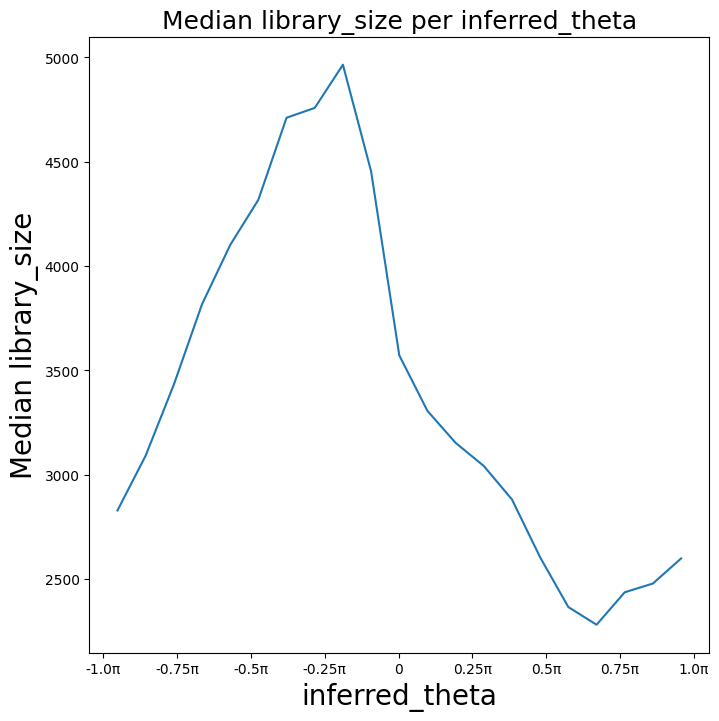

In [63]:
plotting.modify_axis_labels()
plotting.plot_smoothed_size_evolution(adata, "inferred_theta")

<Axes: xlabel='inferred_theta'>

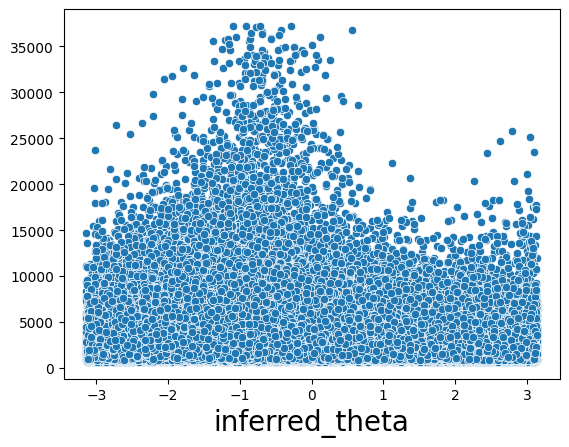

In [38]:
sns.scatterplot(x=df_mean["inferred_theta"], y=library_size)

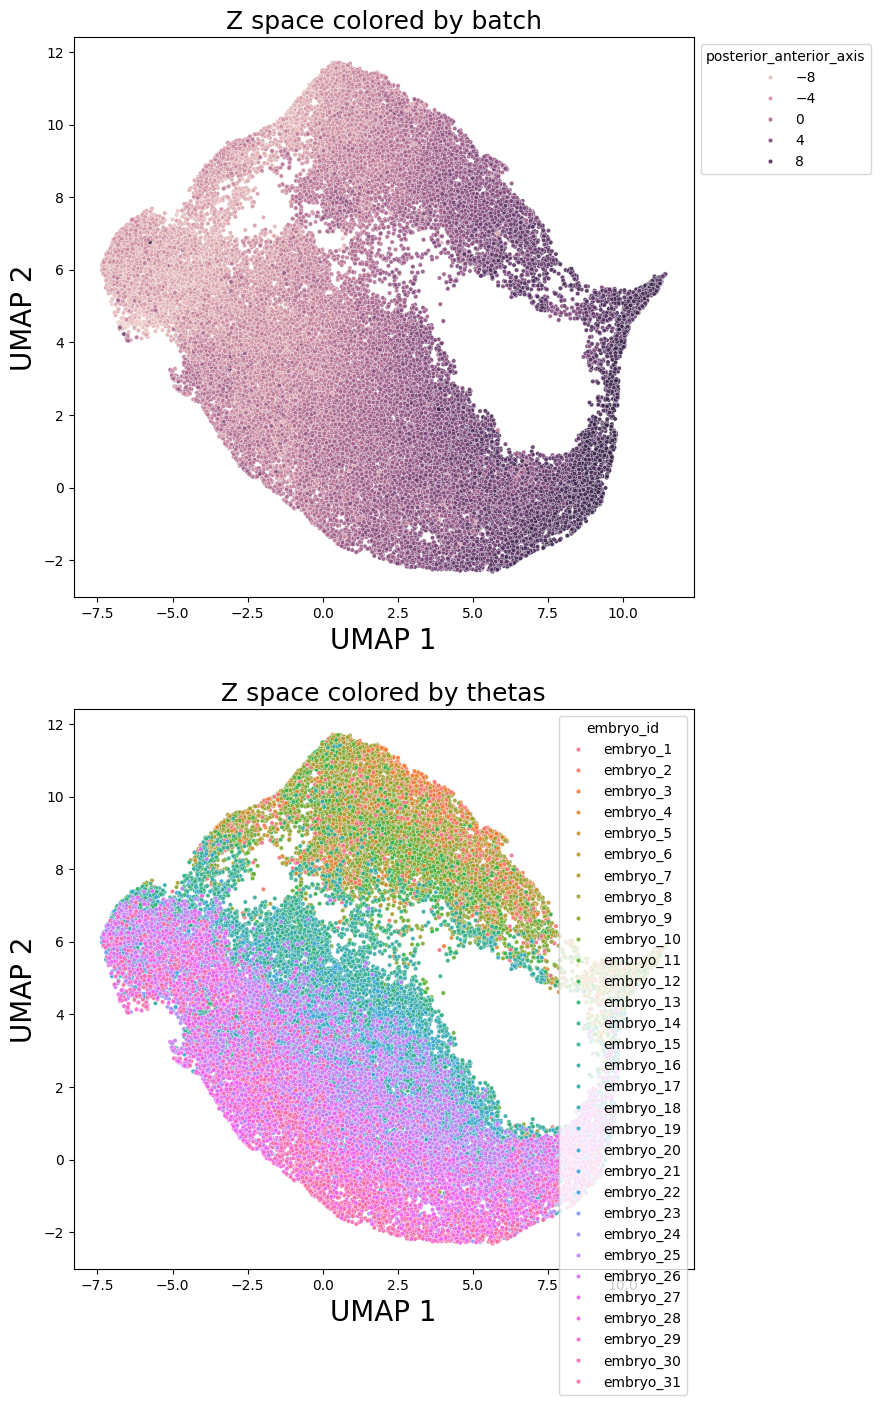

In [41]:
plotting.plot_z_space(
    space_outputs["z"],
    adata.obs["posterior_anterior_axis"],
    adata.obs["embryo_id"],
    cell_identity_label="batch",
)

/home/maxine/Documents/paychere/CoPhaser/src/CoPhaser/plotting.py:232: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


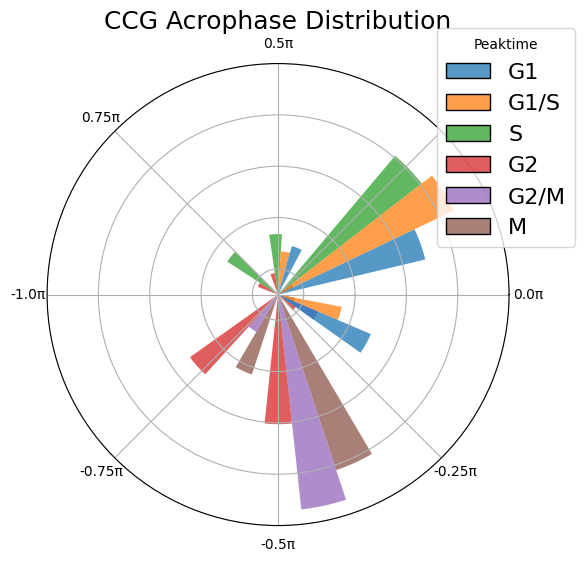

In [42]:
with plt.rc_context({"legend.fontsize": 16}):
    plotting.plot_cell_cycle(df_rhythmic)

47 histone genes found in data


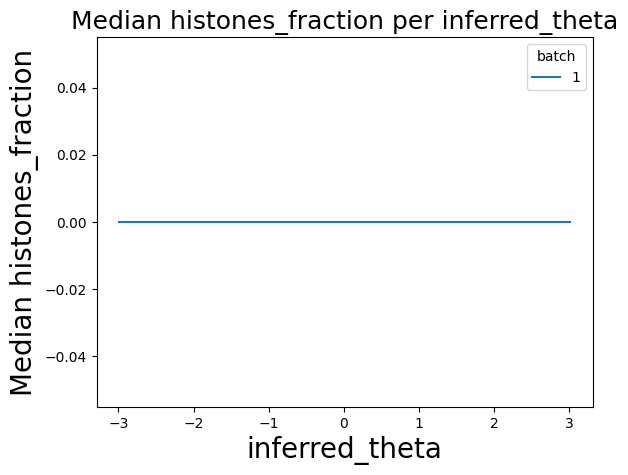

In [56]:
utils.add_histones_fraction(adata=adata, layer="total", use_only_clustered=True)
plotting.plot_smoothed_size_evolution(
    adata, "inferred_theta", counts_sum_field="histones_fraction", hue="batch"
)

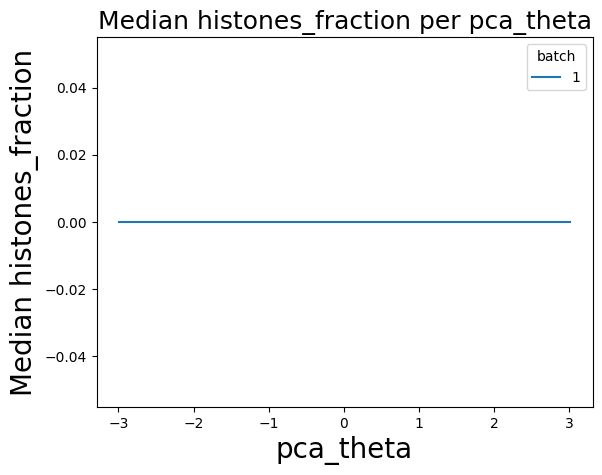

In [62]:
plotting.plot_smoothed_size_evolution(
    adata, "pca_theta", counts_sum_field="histones_fraction", hue="batch"
)

In [48]:
to_save = {}
to_save["library_size"] = adata.obs["library_size"].to_numpy()
to_save["inferred_theta"] = adata.obs["inferred_theta"].to_numpy()
to_save["histones_fraction"] = adata.obs["histones_fraction"].to_numpy()
to_save["cell_indices"] = adata.obs.index.to_numpy()
to_save["z_space"] = {
    "z": space_outputs["z"].detach().numpy(),
}
to_save["context_genes"] = model.context_genes
to_save["cycling_genes"] = model.rhythmic_gene_names
to_save["df_mean"] = df_mean
to_save["df_rhythmic"] = df_rhythmic
to_save["df_z"] = df_z
to_save["f_space"] = {
    "f_1": cells_projected[:, 0],
    "f_2": cells_projected[:, 1],
}

In [51]:
# import pickle

# with open("data/chengxiang_cell_cycle_results.pkl", "wb") as f:
#     pickle.dump(to_save, f)

In [50]:
# pickle.dump(to_save, open("data/rpe_results.pkl", "wb"))